# Capstone Project - Initial Analysis C2T4

## Susana Reyes

In [2]:
#Import Modules
#Numpy, pandas, scify, math, matplotlib
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pydotplus
import graphviz
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#SKLearn, need to specify where the function "lives" before importing it
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Import other classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#from sklearn.datasets import load_digits
#from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

import pandas_profiling

#Helpers

%matplotlib inline

In [3]:
#Import CSV file after Pre-Processing
#df = pd.read_csv('Centennial Excel.csv')
#df.head()

df = pd.read_csv('C5654JQHZUHN0772B561_header.txt', sep="|")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115206 entries, 0 to 115205
Data columns (total 85 columns):
 #   Column                                                                                            Non-Null Count   Dtype  
---  ------                                                                                            --------------   -----  
 0   Record Identifier                                                                                 115206 non-null  int64  
 1   Legal Entity Identifier (LEI)                                                                     115206 non-null  object 
 2   Loan Type                                                                                         115206 non-null  int64  
 3   Loan Purpose                                                                                      115206 non-null  int64  
 4   Preapproval                                                                                       115206 non-null  i

In [3]:
#profile = pandas_profiling.ProfileReport(rawData)
#profile.to_file("Centennial.html")

In [4]:
df.describe()

,Record Identifier,Loan Type,Loan Purpose,Preapproval,Construction Method,Occupancy Type,Loan Amount,Action Taken,County,Census Tract,...,Submission of Application,Initially Payable to Your Institution,Automated Underwriting System: 1,Automated Underwriting System: 2,Automated Underwriting System: 3,Automated Underwriting System: 4,Automated Underwriting System: 5,Reverse Mortgage,Open-End Line of Credit,Business or Commercial Purpose
count,115206.0,115206.000000,115206.000000,115206.0,115206.000000,115206.000000,1.152060e+05,115206.000000,115206.000000,1.152060e+05,...,115206.000000,115206.000000,115206.000000,0.0,0.0,0.0,0.0,115206.0,115206.0,115206.000000
mean,2.0,2.264257,11.413268,2.0,1.002717,1.095828,2.609501e+05,2.186952,28751.772573,2.875198e+10,...,1.004288,1.003958,1.804255,NaN,NaN,NaN,NaN,2.0,2.0,1.964733
std,0.0,0.964456,14.390873,0.0,0.052053,0.392235,1.412290e+05,1.406642,16791.317487,1.679135e+10,...,0.090707,0.088886,1.836975,NaN,NaN,NaN,NaN,0.0,0.0,0.184455
min,2.0,1.000000,1.000000,2.0,1.000000,1.000000,5.000000e+03,1.000000,1001.000000,1.001020e+09,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.0,2.0,1.000000
25%,2.0,1.000000,1.000000,2.0,1.000000,1.000000,1.650000e+05,1.000000,12109.000000,1.210902e+10,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.0,2.0,2.000000
50%,2.0,3.000000,1.000000,2.0,1.000000,1.000000,2.350000e+05,1.000000,29183.000000,2.918331e+10,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.0,2.0,2.000000
75%,2.0,3.000000,31.000000,2.0,1.000000,1.000000,3.350000e+05,4.000000,45079.000000,4.507901e+10,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.0,2.0,2.000000
max,2.0,3.000000,32.000000,2.0,2.000000,3.000000,2.885000e+06,6.000000,56045.000000,5.604595e+10,...,3.000000,3.000000,6.000000,NaN,NaN,NaN,NaN,2.0,2.0,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115206 entries, 0 to 115205
Data columns (total 85 columns):
 #   Column                                                                                            Non-Null Count   Dtype  
---  ------                                                                                            --------------   -----  
 0   Record Identifier                                                                                 115206 non-null  int64  
 1   Legal Entity Identifier (LEI)                                                                     115206 non-null  object 
 2   Loan Type                                                                                         115206 non-null  int64  
 3   Loan Purpose                                                                                      115206 non-null  int64  
 4   Preapproval                                                                                       115206 non-null  i

In [6]:
df.columns

Index(['Record Identifier', 'Legal Entity Identifier (LEI)', 'Loan Type',
       'Loan Purpose', 'Preapproval', 'Construction Method', 'Occupancy Type',
       'Loan Amount', 'Action Taken', 'State', 'County', 'Census Tract',
       'Ethnicity of Applicant or Borrower: 1',
       'Ethnicity of Applicant or Borrower: 2',
       'Ethnicity of Applicant or Borrower: 3',
       'Ethnicity of Applicant or Borrower: 4',
       'Ethnicity of Applicant or Borrower: 5',
       'Ethnicity of Co-Applicant or Co-Borrower: 1',
       'Ethnicity of Co-Applicant or Co-Borrower: 2',
       'Ethnicity of Co-Applicant or Co-Borrower: 3',
       'Ethnicity of Co-Applicant or Co-Borrower: 4',
       'Ethnicity of Co-Applicant or Co-Borrower: 5',
       'Ethnicity of Applicant or Borrower Collected on the Basis of Visual Observation or Surname',
       'Ethnicity of Co-Applicant or Co-Borrower Collected on the Basis of Visual Observation or Surname',
       'Race of Applicant or Borrower: 1', 'Race of Appl

In [7]:
#check for missing values
print(df.isnull().sum())

Record Identifier                        0
Legal Entity Identifier (LEI)            0
Loan Type                                0
Loan Purpose                             0
Preapproval                              0
                                     ...  
Automated Underwriting System: 4    115206
Automated Underwriting System: 5    115206
Reverse Mortgage                         0
Open-End Line of Credit                  0
Business or Commercial Purpose           0
Length: 85, dtype: int64


In [8]:
df1 = df.filter(['Loan Purpose', 'Preapproval', 'Construction Method','Occupancy Type',   
                'Loan Amount', 'Action Taken', 'State', 'County', 'Census Tract', 
                'Ethnicity of Applicant or Borrower: 1','Ethnicity of Co-Applicant or Co-Borrower: 1',
                'Ethnicity of Applicant or Borrower Collected on the Basis of Visual Observation or Surname',
                'Ethnicity of Co-Applicant or Co-Borrower Collected on the Basis of Visual Observation or Surname',
                'Race of Applicant or Borrower: 1', 'Race of Co-Applicant or Co-Borrower: 1','Sex of Applicant or Borrower', 
                'Sex of Co-Applicant or Co-Borrower',
                'Sex of Applicant or Borrower Collected on the Basis of Visual Observation or Surname',
                'Sex of Co-Applicant or Co-Borrower Collected on the Basis of Visual Observation or Surname', 
                'Age of Applicant or Borrower','Age of Co-Applicant or Co-Borrower',
                'Income', 'Type of Purchaser'], axis=1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115206 entries, 0 to 115205
Data columns (total 23 columns):
 #   Column                                                                                            Non-Null Count   Dtype  
---  ------                                                                                            --------------   -----  
 0   Loan Purpose                                                                                      115206 non-null  int64  
 1   Preapproval                                                                                       115206 non-null  int64  
 2   Construction Method                                                                               115206 non-null  int64  
 3   Occupancy Type                                                                                    115206 non-null  int64  
 4   Loan Amount                                                                                       115206 non-null  i

In [10]:
df1 = df1.dropna(subset=['Income'])

In [11]:
df1 = df1.dropna(subset=['Ethnicity of Applicant or Borrower: 1'])

In [12]:
df1 = df1.dropna(subset=['Ethnicity of Co-Applicant or Co-Borrower: 1'])

In [13]:
df1 = df1.dropna(subset=['Race of Applicant or Borrower: 1'])

In [14]:
df1 = df1.dropna(subset=['Race of Co-Applicant or Co-Borrower: 1'])

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100271 entries, 94 to 115205
Data columns (total 23 columns):
 #   Column                                                                                            Non-Null Count   Dtype  
---  ------                                                                                            --------------   -----  
 0   Loan Purpose                                                                                      100271 non-null  int64  
 1   Preapproval                                                                                       100271 non-null  int64  
 2   Construction Method                                                                               100271 non-null  int64  
 3   Occupancy Type                                                                                    100271 non-null  int64  
 4   Loan Amount                                                                                       100271 non-null  

In [16]:
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
age_dictionary ={'<25' : 24, '25-34' : 25, '35-44' : 35, '45-54' : 45, '55-64' : 55, '65-74' : 65, '>74': 75, '8888' : 0} 
  
# Add a new column named 'Price' 
df1['Age of Applicant or Borrower 1'] = df['Age of Applicant or Borrower'].apply(set_value, args =(age_dictionary, )) 
  
# Print the DataFrame 
print(df1) 


        Loan Purpose  Preapproval  Construction Method  Occupancy Type  \
94                 1            2                    1               1   
96                 1            2                    1               1   
98                 1            2                    1               1   
99                 1            2                    1               1   
100                1            2                    1               1   
...              ...          ...                  ...             ...   
115200            31            2                    1               1   
115201             1            2                    1               1   
115202            32            2                    1               1   
115204            31            2                    1               1   
115205            31            2                    1               1   

        Loan Amount  Action Taken State  County  Census Tract  \
94           105000             3    TX   4802

In [17]:
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
age_dictionary ={'<25' : 24, '25-34' : 25, '35-44' : 35, '45-54' : 45, '55-64' : 55, '65-74' : 65, '>74': 75, '8888' : 0, '9999' : 0} 
  
# Add a new column named 'Price' 
df1['Age of Co-Applicant or Co-Borrower 1'] = df['Age of Co-Applicant or Co-Borrower'].apply(set_value, args =(age_dictionary, )) 
  
# Print the DataFrame 
print(df1) 


        Loan Purpose  Preapproval  Construction Method  Occupancy Type  \
94                 1            2                    1               1   
96                 1            2                    1               1   
98                 1            2                    1               1   
99                 1            2                    1               1   
100                1            2                    1               1   
...              ...          ...                  ...             ...   
115200            31            2                    1               1   
115201             1            2                    1               1   
115202            32            2                    1               1   
115204            31            2                    1               1   
115205            31            2                    1               1   

        Loan Amount  Action Taken State  County  Census Tract  \
94           105000             3    TX   4802

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100271 entries, 94 to 115205
Data columns (total 25 columns):
 #   Column                                                                                            Non-Null Count   Dtype  
---  ------                                                                                            --------------   -----  
 0   Loan Purpose                                                                                      100271 non-null  int64  
 1   Preapproval                                                                                       100271 non-null  int64  
 2   Construction Method                                                                               100271 non-null  int64  
 3   Occupancy Type                                                                                    100271 non-null  int64  
 4   Loan Amount                                                                                       100271 non-null  

In [19]:
#reassign variables to integer
df1.iloc[:,17] = df1.iloc[:,17].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100271 entries, 94 to 115205
Data columns (total 25 columns):
 #   Column                                                                                            Non-Null Count   Dtype  
---  ------                                                                                            --------------   -----  
 0   Loan Purpose                                                                                      100271 non-null  int64  
 1   Preapproval                                                                                       100271 non-null  int64  
 2   Construction Method                                                                               100271 non-null  int64  
 3   Occupancy Type                                                                                    100271 non-null  int64  
 4   Loan Amount                                                                                       100271 non-null  

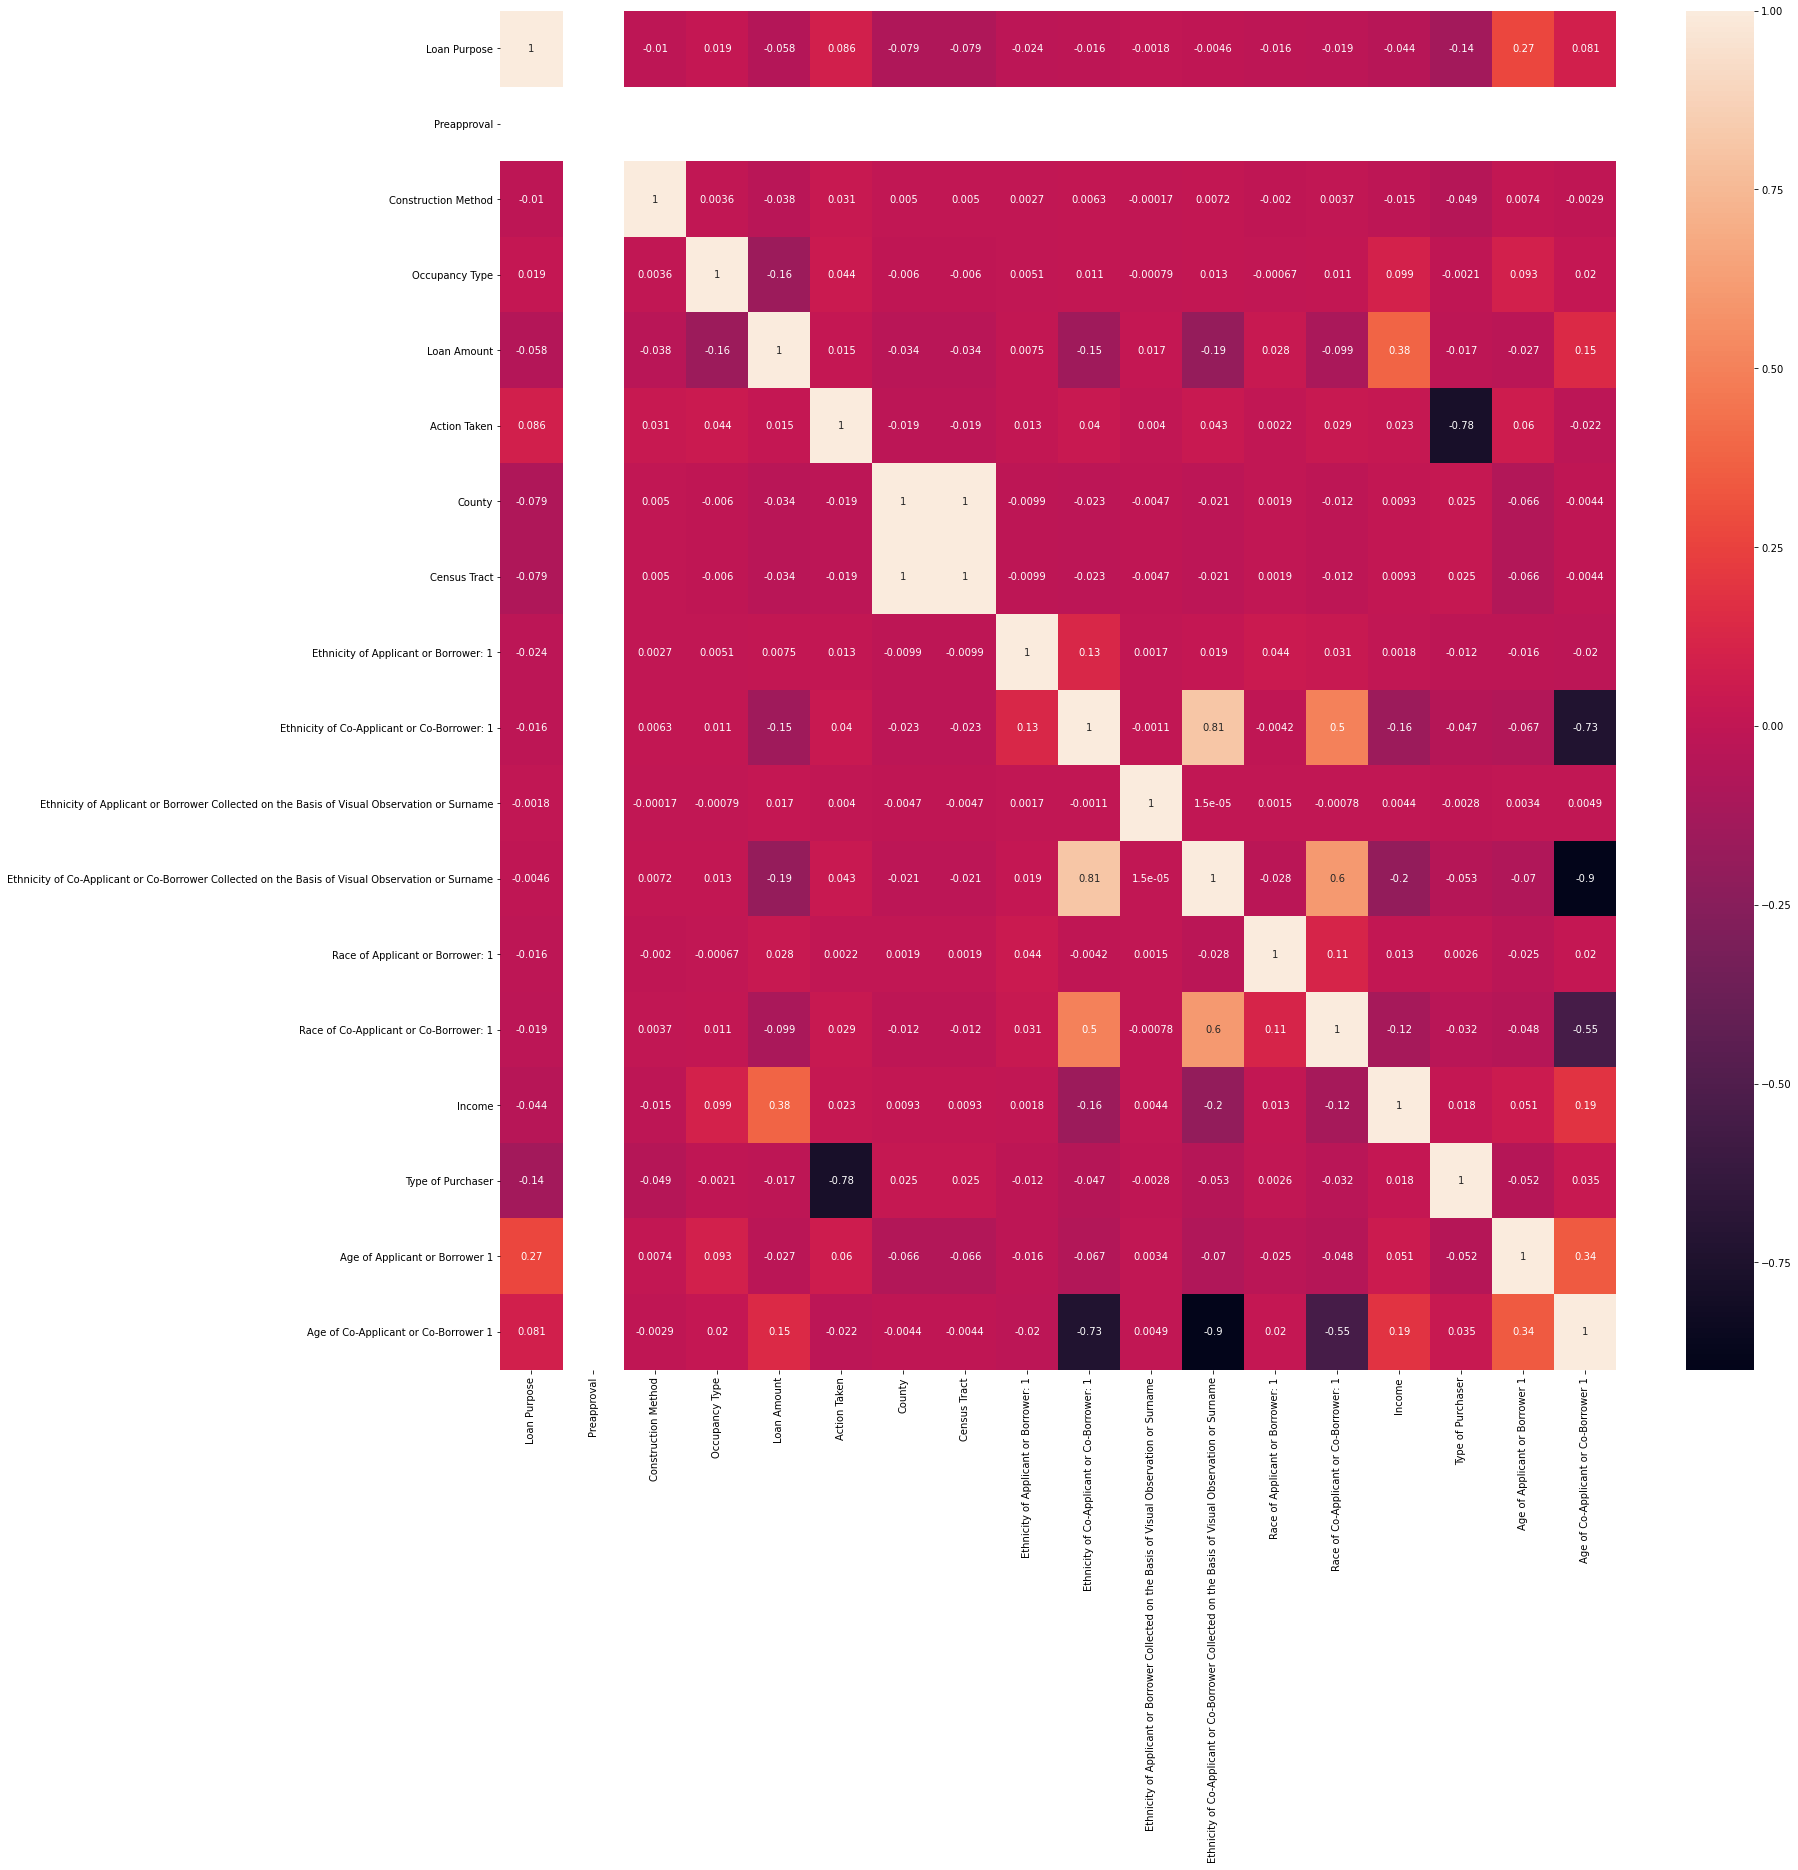

In [20]:
df1_corr = df1.corr()
plt.figure(figsize=(25,25))
sns.heatmap(df1_corr, annot=True)
plt.show()

In [20]:
df1.head()

,Loan Purpose,Preapproval,Construction Method,Occupancy Type,Loan Amount,Action Taken,State,County,Census Tract,Ethnicity of Applicant or Borrower: 1,...,Sex of Applicant or Borrower,Sex of Co-Applicant or Co-Borrower,Sex of Applicant or Borrower Collected on the Basis of Visual Observation or Surname,Sex of Co-Applicant or Co-Borrower Collected on the Basis of Visual Observation or Surname,Age of Applicant or Borrower,Age of Co-Applicant or Co-Borrower,Income,Type of Purchaser,Age of Applicant or Borrower 1,Age of Co-Applicant or Co-Borrower 1
94,1,2,1,1,105000,3,TX,48029,48029182001,1.0,...,1,5,2,4,45-54,9999,120.0,0,45,0
96,1,2,1,1,95000,3,CO,8035,8035014010,2.0,...,2,5,2,4,25-34,9999,65.0,0,25,0
98,1,2,1,1,205000,1,SC,45083,45083023402,2.0,...,1,5,2,4,45-54,9999,137.0,0,45,0
99,1,2,1,1,165000,3,MT,30081,30081000100,3.0,...,2,5,2,4,65-74,9999,26.0,0,65,0
100,1,2,1,1,115000,1,AZ,4019,4019004411,2.0,...,1,5,2,4,25-34,9999,118.0,0,25,0


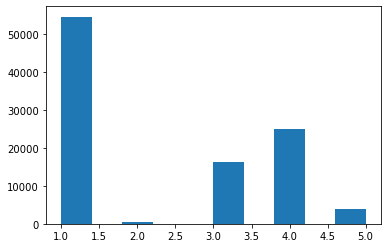

In [21]:
plt.hist(df1['Action Taken'])
plt.show()
#Descriptions: 
    #1. Loan originated 
    #2. Application approved but not accepted 
    #3. Application denied 
    #4. Application withdrawn by applicant 
    #5. File closed for incompleteness 
    #6. Purchased loan 
    #7. Preapproval request denied 
    #8. Preapproval request approved but not accepted

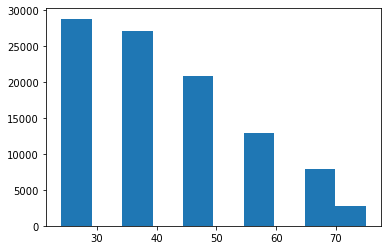

In [22]:
plt.hist(df1['Age of Applicant or Borrower 1'])
plt.show()

In [23]:
#1. Select the features (you should now have determined a final set of features to be 
#used in your analysis after studying the correlation and covariance of the data):

#features
X = df1.iloc[:,[0,1,2,3,4,7,8,9,10,11,12,13,14,17,18,19,20]]
#X = df1.iloc[:,[0,1,2,3,4,7,8,9,10,11,12,13,14,17,18,19,20]]
print('Summary of feature sample')
X.head

Summary of feature sample


<bound method NDFrame.head of         Loan Purpose  Preapproval  Construction Method  Occupancy Type  \
94                 1            2                    1               1   
96                 1            2                    1               1   
98                 1            2                    1               1   
99                 1            2                    1               1   
100                1            2                    1               1   
...              ...          ...                  ...             ...   
115200            31            2                    1               1   
115201             1            2                    1               1   
115202            32            2                    1               1   
115204            31            2                    1               1   
115205            31            2                    1               1   

        Loan Amount  County  Census Tract  \
94           105000   48029   480291

In [23]:
#Dependent Variable
y = df1['Action Taken']
y.head

<bound method NDFrame.head of 94        3
96        3
98        1
99        3
100       1
         ..
115200    3
115201    4
115202    4
115204    3
115205    3
Name: Action Taken, Length: 100271, dtype: int64>

In [25]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [26]:
dtc1 = DecisionTreeClassifier()
dtcFit1 = dtc1.fit(X_train,y_train)

#Predictions
dtc1preds = dtcFit1.predict(X_test)

print(classification_report(y_test, dtc1preds))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89     16450
           2       0.03      0.04      0.03       168
           3       0.44      0.44      0.44      4871
           4       0.52      0.51      0.52      7469
           5       0.09      0.10      0.09      1124

    accuracy                           0.69     30082
   macro avg       0.39      0.39      0.39     30082
weighted avg       0.69      0.69      0.69     30082



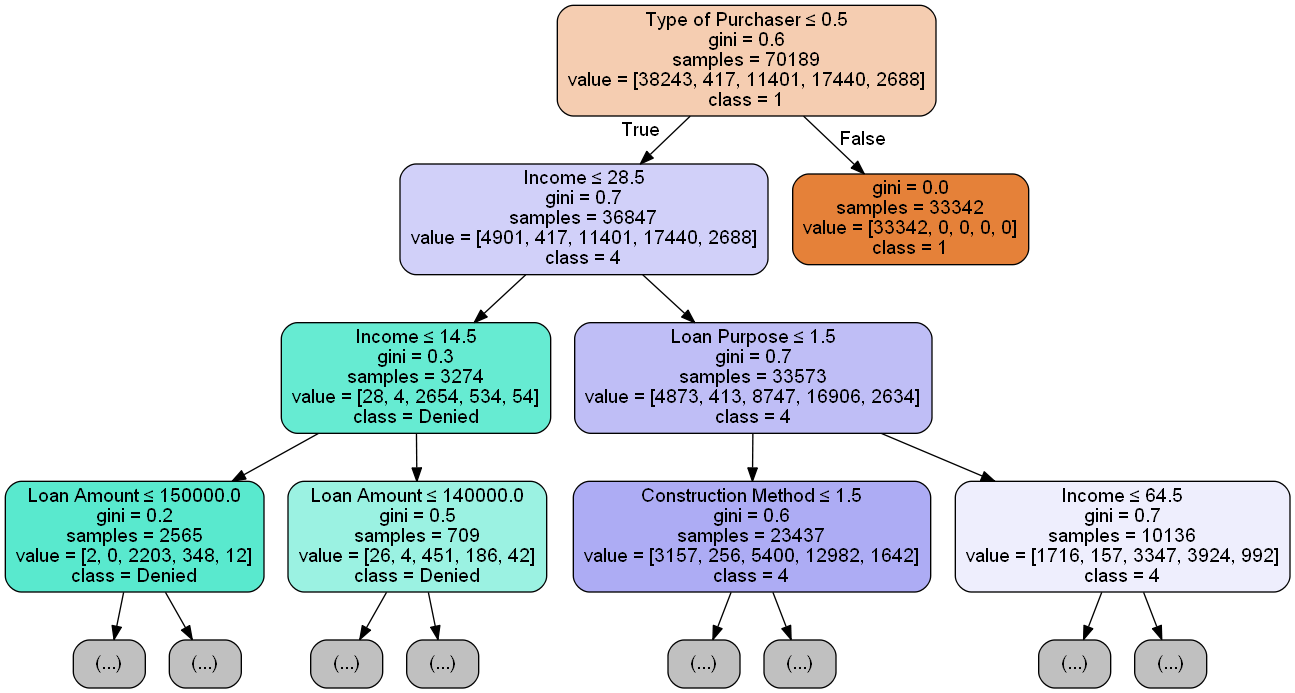

In [27]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit1, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['1','2','Denied','4','6'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [27]:
X = df1.iloc[:,[9,13,23]]
#X = df1.iloc[:,[9,13,17,19]]
print('Summary of feature sample')
X.head

Summary of feature sample


<bound method NDFrame.head of         Ethnicity of Applicant or Borrower: 1  \
94                                        1.0   
96                                        2.0   
98                                        2.0   
99                                        3.0   
100                                       2.0   
...                                       ...   
115200                                    2.0   
115201                                    1.0   
115202                                    2.0   
115204                                    2.0   
115205                                    2.0   

        Race of Applicant or Borrower: 1  Age of Applicant or Borrower 1  
94                                   2.0                              45  
96                                   5.0                              25  
98                                   5.0                              45  
99                                   5.0                              65  
100   

In [28]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

dtc2 = DecisionTreeClassifier()
dtcFit2 = dtc2.fit(X_train,y_train)

#Predictions
dtc2preds = dtcFit2.predict(X_test)

print(classification_report(y_test, dtc2preds))

              precision    recall  f1-score   support

           1       0.55      0.99      0.71     16450
           2       0.20      0.01      0.01       168
           3       0.20      0.00      0.01      4871
           4       0.31      0.01      0.02      7469
           5       0.00      0.00      0.00      1124

    accuracy                           0.55     30082
   macro avg       0.25      0.20      0.15     30082
weighted avg       0.41      0.55      0.39     30082



C:\Users\sreyes\Anaconda3\envs\dataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


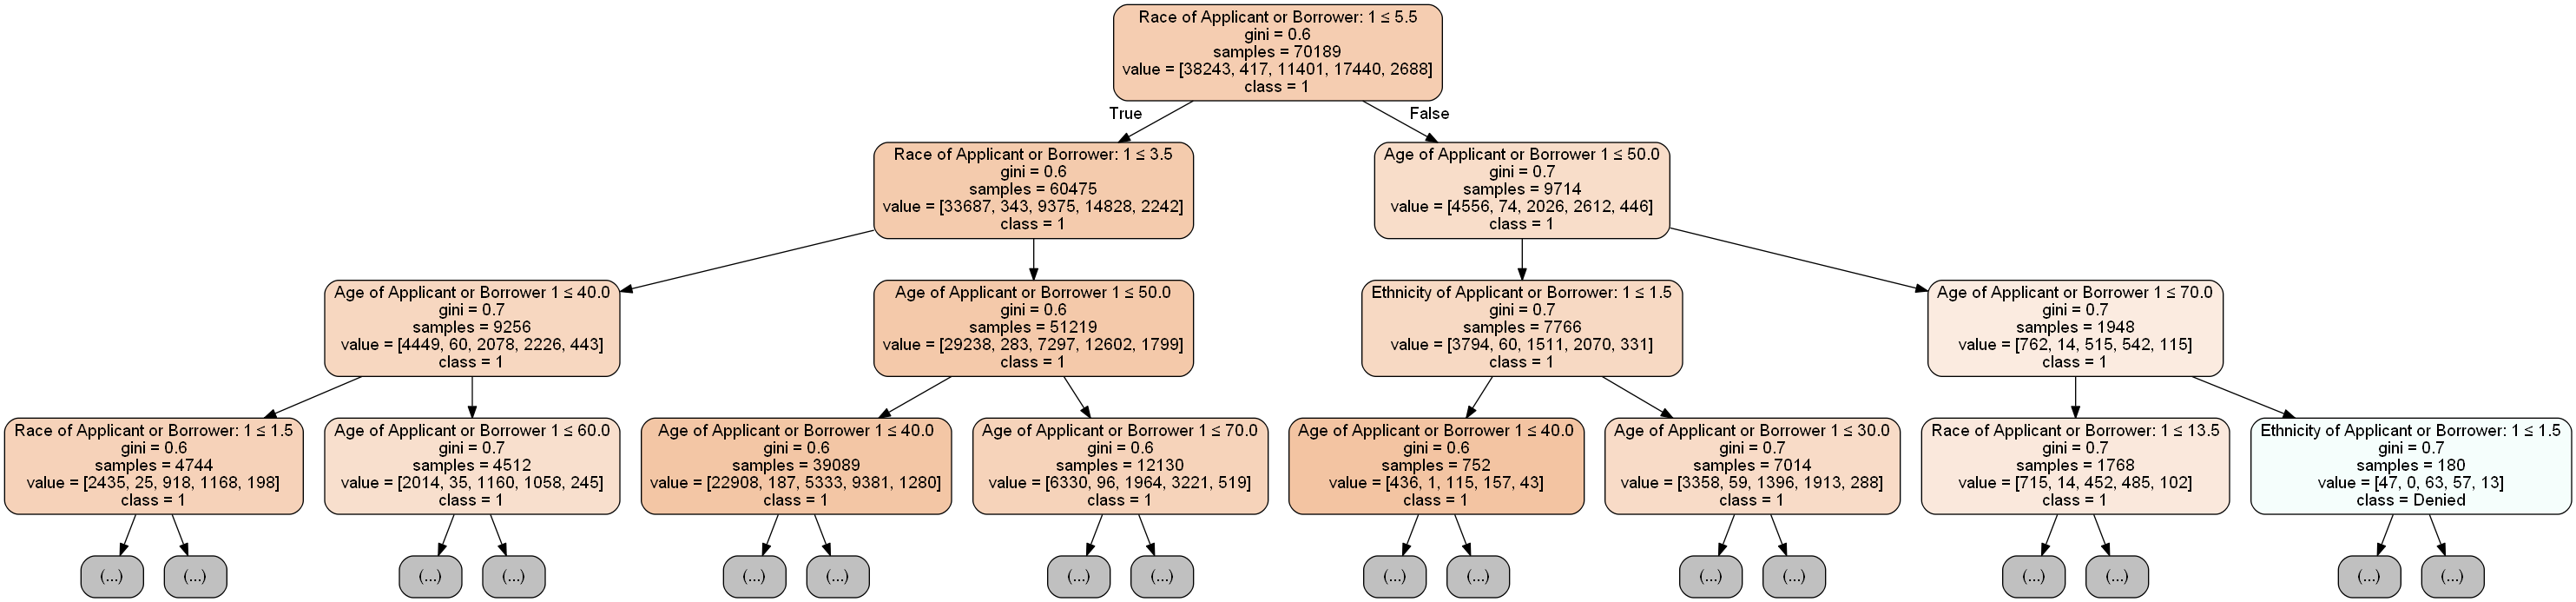

In [29]:
from IPython.display import Image 
dot_data = export_graphviz(dtcFit2, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['1','2','Denied','4','5'],  
                     filled=True, rounded=True, max_depth=3,  
                     special_characters=True, precision=1)

graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())